## Analyze the Clusters

Look at each of the clustering approaches and analyze them

In [1]:
# Uncomment to get the correct versions
from IPython.display import clear_output
!pip install -r ../requirements.txt
clear_output() 


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import analyze_clusters as ac
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# Get dataset
x_train_path = '../../data/train_test_split/x_train_cluster.csv'
y_train_path = '../../data/train_test_split/y_train.csv'

x_train_df = pd.read_csv(x_train_path) 
y_train_df = pd.read_csv(y_train_path) 

df = pd.merge(x_train_df, y_train_df, how='left', left_index=True, right_index=True)


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
other_df = '../../data/dbscan_clusters.csv'
other_df = pd.read_csv(other_df)

In [7]:
other_df.head() 

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,is_drafted,cluster,cluster_dbscan_pca,x_cord_pca,y_cord_pca,cluster_dbscan_tsne,x_cord_tsne,y_cord_tsne
0,0,361,361,C.J. Prosise,0.8915,365.0,2012,S,74.0,190.0,35.166812,-80.751458,Woodberry Forest,VA,USA,4,Notre Dame,535958.0,FBS Independents,41.698378,-86.233942,16.0,26.0,1.0,190.0,0.615385,539.828641,defense,d_backfield,1.0,4,-1,1.842170,1.227748,16,-15.516190,76.534010
1,1,14685,14686,Jaylon Haynes,0.8166,1684.0,2017,DT,73.0,290.0,29.312480,-96.098238,Wharton,TX,USA,3,UTSA,4245215.0,American Athletic,29.416983,-98.478814,9.0,25.0,0.0,-118.0,0.360000,143.529399,defense,d_line,0.0,-1,0,-1.494322,0.919590,0,33.669120,-29.551163
2,2,15617,15618,Nasser Clark,0.7667,3299.0,2017,RB,70.0,190.0,34.597245,-83.763306,Cleveland,GA,USA,2,Army,NaN,American Athletic,41.387492,-73.964089,10.0,25.0,1.0,62.0,0.400000,709.669019,offense,running_back,0.0,-1,1,-1.891933,-2.075284,14,-15.427162,-66.531170
3,3,3870,3870,Courtney Miggins,0.8111,1568.0,2013,SDE,77.0,240.0,33.712331,-84.105194,Lithonia,GA,USA,3,Louisiana,NaN,Sun Belt,30.215843,-92.041737,18.0,26.0,2.0,128.0,0.692308,523.980272,defense,d_line,0.0,15,0,1.411790,-0.646696,0,11.773317,-0.538231
4,4,20038,20046,Zaylin Wood,0.8383,1429.0,2019,SDE,74.0,262.0,33.537889,-85.253282,Bowdon,GA,USA,3,Middle Tennessee,4428925.0,Conference USA,35.851146,-86.368165,15.0,27.0,1.0,29.0,0.555556,171.919819,defense,d_line,0.0,15,0,0.758831,0.013828,0,26.958310,-0.476230


In [8]:
df.head() 

,Unnamed: 0.1,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,DBSCAN_Cluster_PCA,SVD_KMeans_Cluster,KMeans_Cluster,Unnamed: 0,is_drafted
0,361,C.J. Prosise,0.8915,365.0,2012,S,74.0,190.0,35.166812,-80.751458,Woodberry Forest,VA,USA,4,Notre Dame,535958.0,FBS Independents,41.698378,-86.233942,16.0,26.0,1.0,190.0,0.615385,539.828641,defense,d_backfield,0,1,2,361,1.0
1,14685,Jaylon Haynes,0.8166,1684.0,2017,DT,73.0,290.0,29.312480,-96.098238,Wharton,TX,USA,3,UTSA,4245215.0,American Athletic,29.416983,-98.478814,9.0,25.0,0.0,-118.0,0.360000,143.529399,defense,d_line,0,3,1,14685,0.0
2,15617,Nasser Clark,0.7667,3299.0,2017,RB,70.0,190.0,34.597245,-83.763306,Cleveland,GA,USA,2,Army,NaN,American Athletic,41.387492,-73.964089,10.0,25.0,1.0,62.0,0.400000,709.669019,offense,running_back,1,3,0,15617,0.0
3,3870,Courtney Miggins,0.8111,1568.0,2013,SDE,77.0,240.0,33.712331,-84.105194,Lithonia,GA,USA,3,Louisiana,NaN,Sun Belt,30.215843,-92.041737,18.0,26.0,2.0,128.0,0.692308,523.980272,defense,d_line,0,1,1,3870,0.0
4,20038,Zaylin Wood,0.8383,1429.0,2019,SDE,74.0,262.0,33.537889,-85.253282,Bowdon,GA,USA,3,Middle Tennessee,4428925.0,Conference USA,35.851146,-86.368165,15.0,27.0,1.0,29.0,0.555556,171.919819,defense,d_line,0,1,1,20038,0.0


### A. SVD_KMeans_Cluster (chrismca)

In [9]:
features = ['rating', 'ranking', 'height', 'weight', 'latitude', 'longitude',
       'latitude_school', 'longitude_school', 'wins_rolling_2year',
       'games_played_rolling_2year', 'point_diff_rolling_2year',
       'win_pct_rolling_2year', 'distance_miles']

In [10]:
t_sne_k_means_name = 'SVD_KMeans_Cluster'
grouped_df = ac.get_basic_stats(df,t_sne_k_means_name)
grouped_df

,SVD_KMeans_Cluster,number_of_players,is_drafted
0,0,3992,0.165080
1,1,6667,0.074246
2,2,2694,0.074981
3,3,4600,0.041739


SVD_KMeans_Cluster
1    0.371359
3    0.256225
0    0.222358
2    0.150058
Name: proportion, dtype: float64


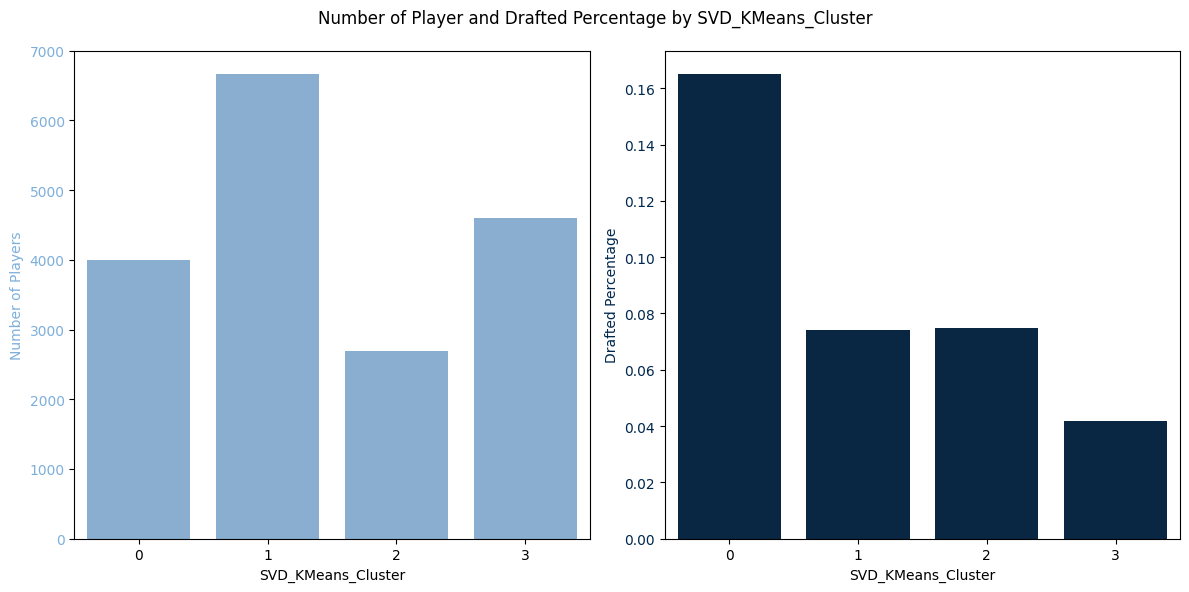

In [11]:
ac.visualize_conversion_and_pop_size(df, t_sne_k_means_name)

Features: ['rating', 'ranking', 'height', 'weight', 'latitude', 'longitude', 'latitude_school', 'longitude_school', 'wins_rolling_2year', 'games_played_rolling_2year', 'point_diff_rolling_2year', 'win_pct_rolling_2year', 'distance_miles']
Numerical Features:


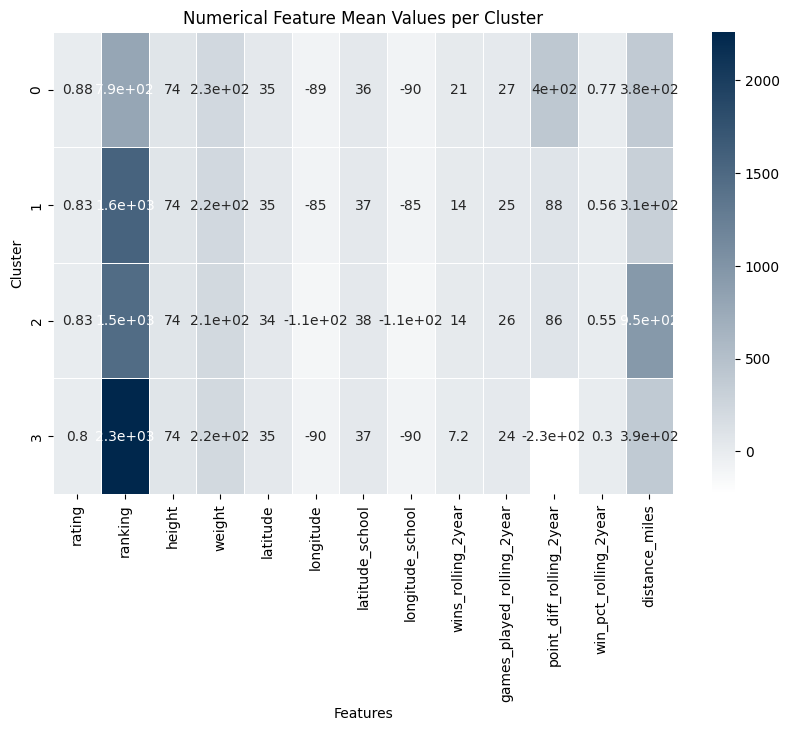

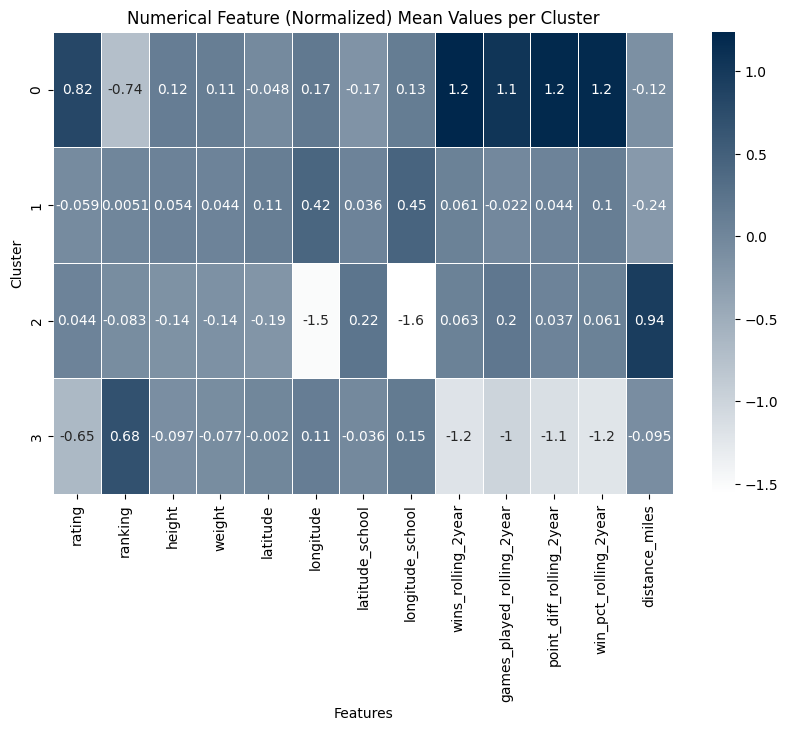

In [12]:
# Visualize the clusters
print(f'Features: {features}')
features_to_analyze = features #+ categorical  # Replace with your actual feature names
ac.plot_feature_distribution_per_cluster(df, features_to_analyze, cluster_column=t_sne_k_means_name)


### B. K-Means (aserban)

In [13]:
features = ['height', 'weight', 'distance_miles', 'stars', 'win_pct_rolling_2year', 'rating']

In [14]:
k_means_name = 'KMeans_Cluster'
grouped_df = ac.get_basic_stats(df,k_means_name)
grouped_df

,KMeans_Cluster,number_of_players,is_drafted
0,0,8090,0.060445
1,1,6372,0.058851
2,2,2474,0.252627
3,3,1017,0.058014


KMeans_Cluster
0    0.450621
1    0.354927
2    0.137804
3    0.056648
Name: proportion, dtype: float64


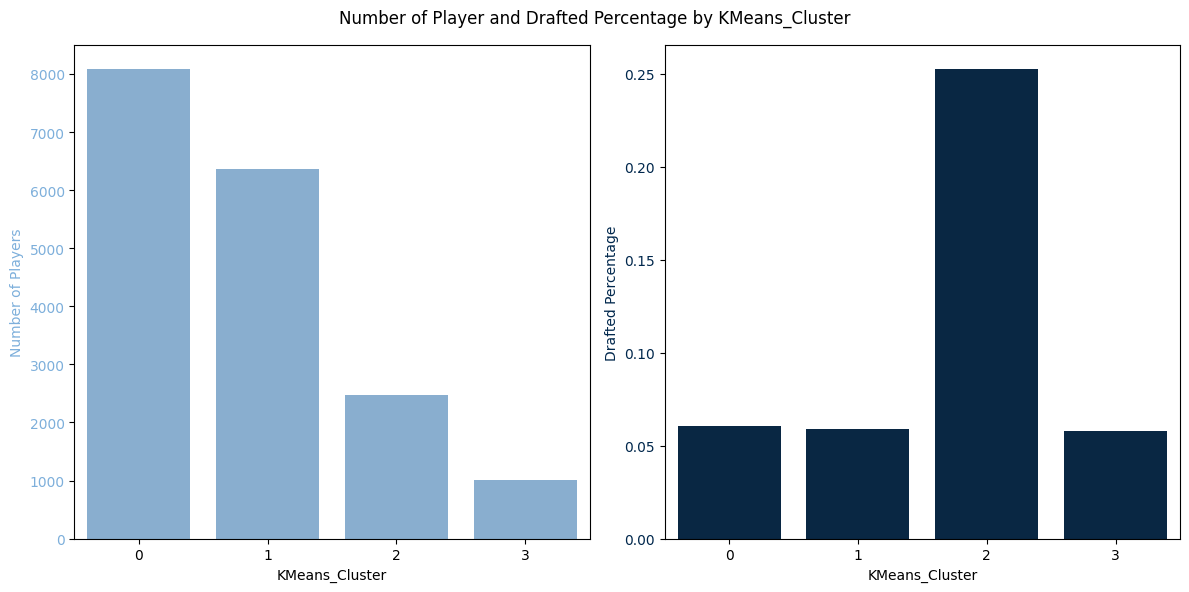

In [15]:
ac.visualize_conversion_and_pop_size(df, k_means_name)

Features: ['height', 'weight', 'distance_miles', 'stars', 'win_pct_rolling_2year', 'rating']
Numerical Features:


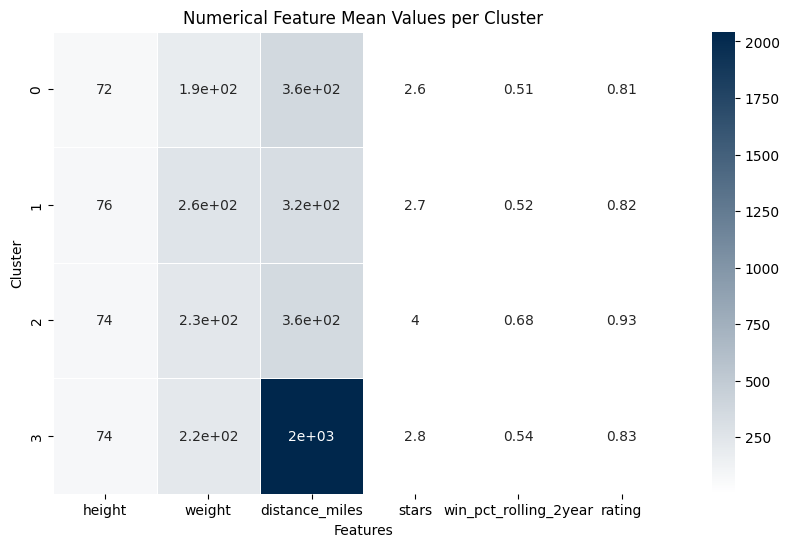

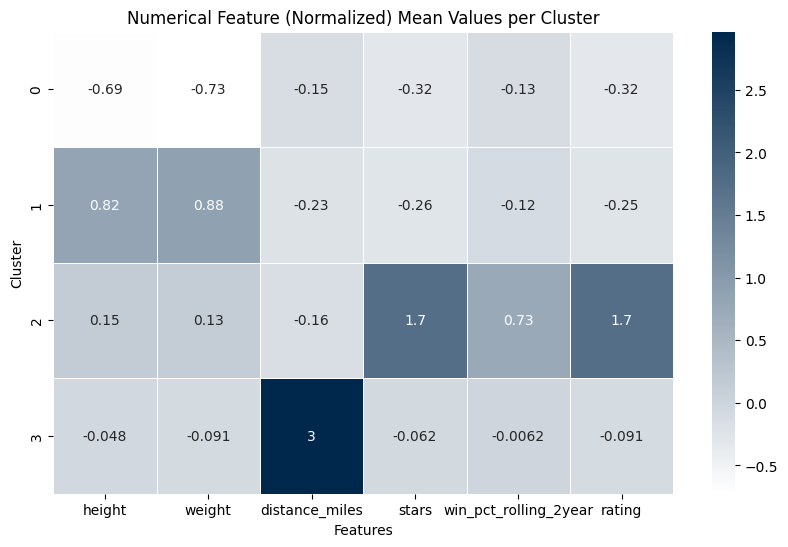

In [16]:
# Visualize the clusters
print(f'Features: {features}')
features_to_analyze = features #+ categorical  # Replace with your actual feature names
ac.plot_feature_distribution_per_cluster(df, features_to_analyze, cluster_column=k_means_name)


### C. DBSCAN Cluster PCA (Ryan)

In [17]:
features = ['rating', 'ranking', 'height', 'weight', 'distance_miles', 'stars', 'wins_rolling_2year', 'games_played_rolling_2year', 'post_season_wins_rolling_2year', 'point_diff_rolling_2year', 'win_pct_rolling_2year']


In [18]:
dbscan_name = 'DBSCAN_Cluster_PCA'
grouped_df = ac.get_basic_stats(df,dbscan_name)
grouped_df

,DBSCAN_Cluster_PCA,number_of_players,is_drafted
0,-1,3392,0.163031
1,0,9669,0.070224
2,1,4091,0.036177
3,2,801,0.209738


DBSCAN_Cluster_PCA
 0    0.538573
 1    0.227873
-1    0.188938
 2    0.044616
Name: proportion, dtype: float64


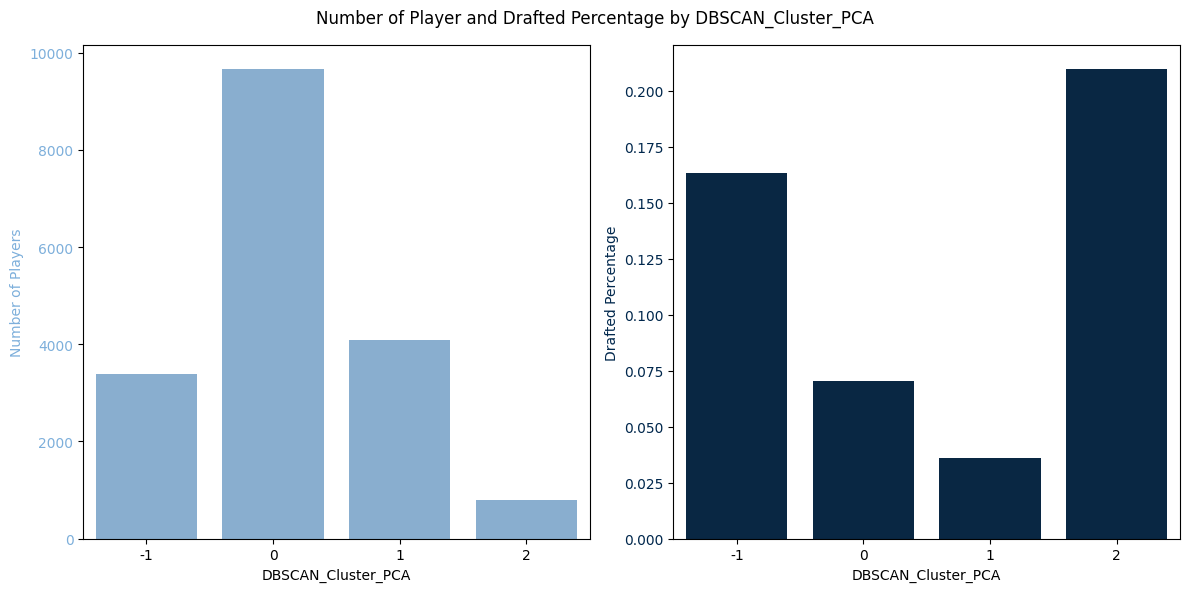

In [19]:
ac.visualize_conversion_and_pop_size(df, dbscan_name)

Features: ['rating', 'ranking', 'height', 'weight', 'distance_miles', 'stars', 'wins_rolling_2year', 'games_played_rolling_2year', 'post_season_wins_rolling_2year', 'point_diff_rolling_2year', 'win_pct_rolling_2year']
Numerical Features:


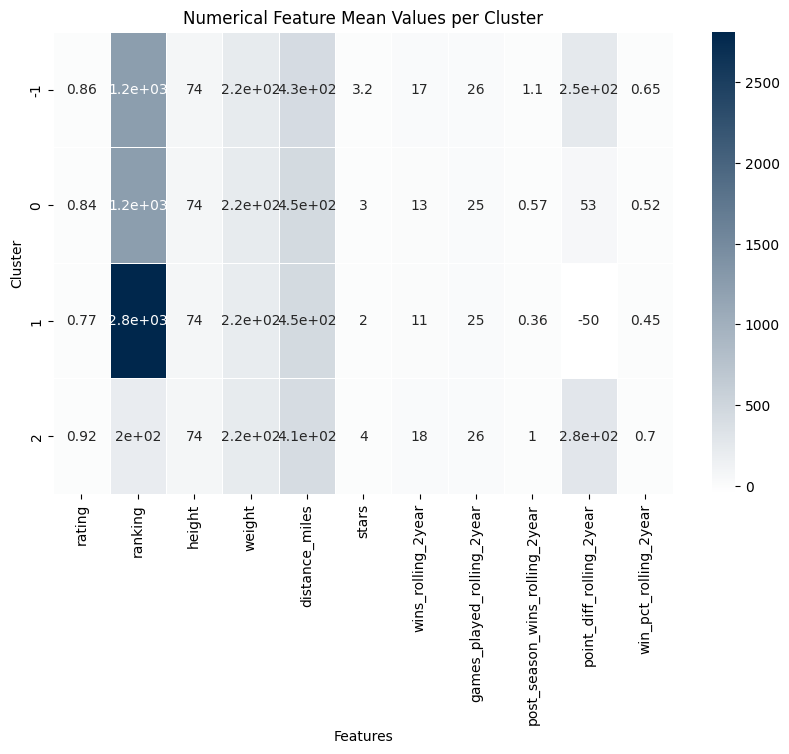

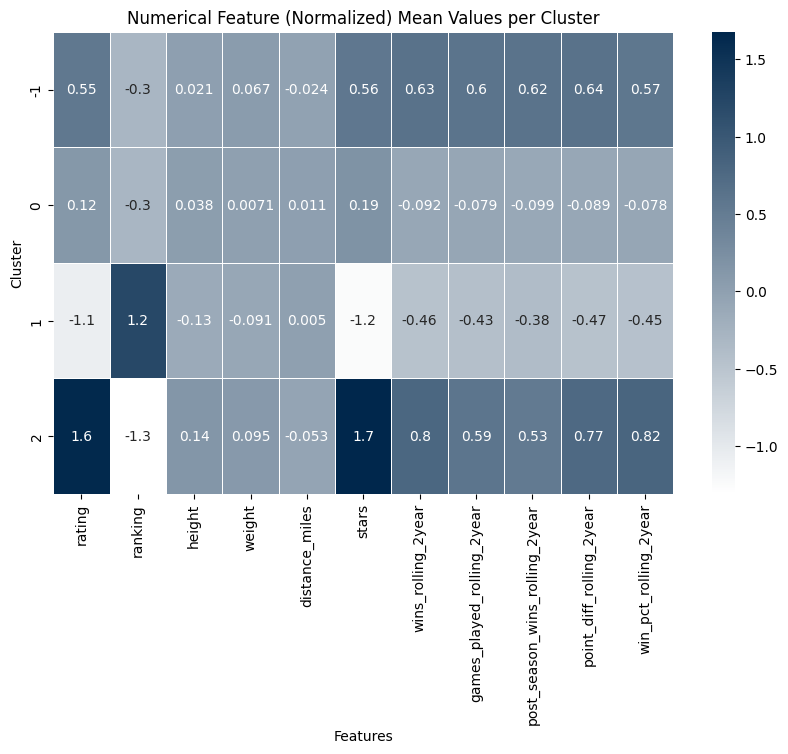

In [20]:
# Visualize the clusters
print(f'Features: {features}')
features_to_analyze = features #+ categorical  # Replace with your actual feature names
ac.plot_feature_distribution_per_cluster(df, features_to_analyze, cluster_column=dbscan_name)
